# Naive Bayes Classifier

**Naive Bayes** is a simple, fast, and effective generative classifier. It is based on **Bayes’ Theorem** with the **naive assumption** that features are conditionally independent given the class label.

$
P(y \mid x) = \frac{P(x \mid y)P(y)}{P(x)}
$

With the naive assumption:

$
P(x_1, x_2, ..., x_n \mid y) = \prod_{i=1}^n P(x_i \mid y)
$

## Common Types

- **Gaussian Naive Bayes** – for continuous features (assumes normal distribution)
- **Multinomial Naive Bayes** – for counts (text data, bag-of-words)
- **Bernoulli Naive Bayes** – for binary features (e.g., presence/absence)

We'll start with **Gaussian Naive Bayes** since we’re using continuous synthetic data.

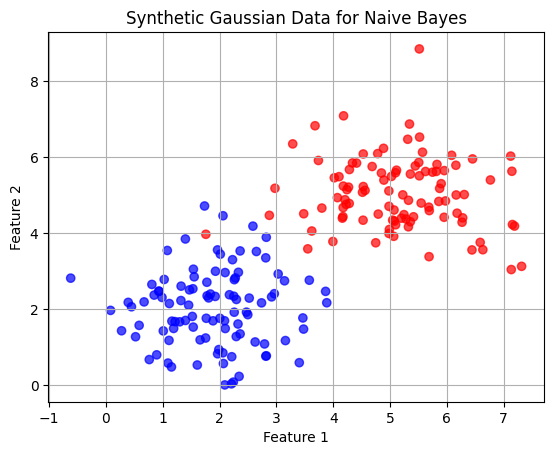

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X0 = np.random.multivariate_normal(mean=[2, 2], cov=[[1, 0], [0, 1]], size=100)
X1 = np.random.multivariate_normal(mean=[5, 5], cov=[[1, 0], [0, 1]], size=100)
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(100), np.ones(100)])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.title("Synthetic Gaussian Data for Naive Bayes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


## From-Scratch: Gaussian Naive Bayes

We estimate:

- Class priors `P(y)`
- For each feature `x_i` and class `y=k`, the Gaussian parameters:
    - Mean `μ_{ik}`
    - Variance `σ²_{ik}`

In [2]:
class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.priors = {c: np.mean(y == c) for c in self.classes}
        self.means = {}
        self.vars = {}
        
        for c in self.classes:
            X_c = X[y == c]
            self.means[c] = np.mean(X_c, axis=0)
            self.vars[c] = np.var(X_c, axis=0) + 1e-9  # smoothing

    def gaussian_pdf(self, x, mean, var):
        return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-(x - mean)**2 / (2 * var))

    def predict_proba(self, X):
        probs = []
        for x in X:
            class_probs = {}
            for c in self.classes:
                prior = np.log(self.priors[c])
                likelihood = np.sum(np.log(self.gaussian_pdf(x, self.means[c], self.vars[c])))
                class_probs[c] = prior + likelihood
            probs.append(class_probs)
        return probs

    def predict(self, X):
        probs = self.predict_proba(X)
        return np.array([max(p, key=p.get) for p in probs])


In [3]:
gnb = GaussianNaiveBayes()
gnb.fit(X, y)
y_pred = gnb.predict(X)

acc = np.mean(y_pred == y)
print(f"Custom Gaussian Naive Bayes Accuracy: {acc:.2f}")


Custom Gaussian Naive Bayes Accuracy: 0.99


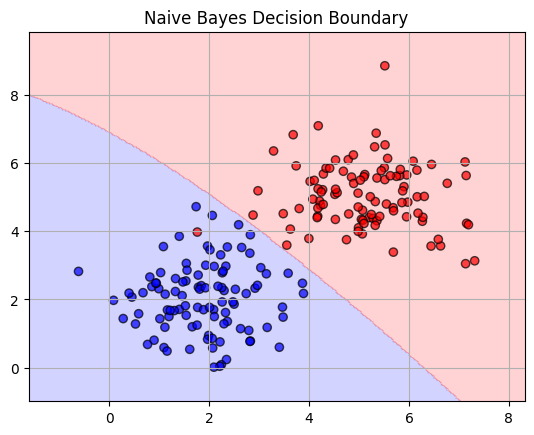

In [4]:
def plot_nb_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    Z = model.predict(grid)
    Z = np.array(Z).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', alpha=0.7)
    plt.title("Naive Bayes Decision Boundary")
    plt.grid(True)
    plt.show()

plot_nb_boundary(gnb, X, y)


- Naive Bayes is a fast, interpretable, probabilistic classifier.
- Assumes **conditional independence** of features given the class.
- **Works surprisingly well**, even when independence is violated.
- Compared our **custom Gaussian Naive Bayes** with `sklearn`, and both perform similarly on synthetic data.
